# K-Means Clustering
Loading the dataset

In [1]:
from sklearn import datasets
iris= datasets.load_iris()

## Elbow method
Before we begin with the clustering, we first need to establish a value for k, i.e. how many clusters is
optimal for the data that we are working with.

In [2]:
#pip install yellowbrick --user

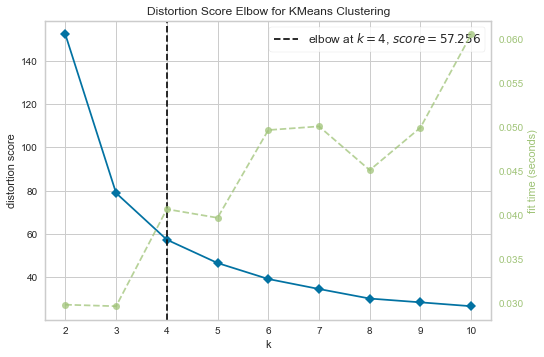

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(iris.data)
model.show()

The KElbowVisualizer function produces a chart use for determining the optimal number of clusters,
which can be modified through a number of parameters. The first element of the function is an unfitted
cluster i.e. KMeans or MiniBatchKMeans. The second term sets the parameter to be used for evaluating
the optimal cluster number. The model is then fitted with values from dataset, or in straightforward
terms, the data that is to be clustered.

When looking at the plot that is produced, you should be able to see that the point where the line begins to level off, creating the appearance of an “elbow” is at the point where the number of clusters is 3. We will therefore use 3 as our value for k.
To begin the process of the k-means clustering, we establish a data object called “clusters_k3”, where the “k3” refers to the chosen value for k. To do this, we will use the kmeans function, setting the number of centroids at 3 (given here under the parameter “n_clusters”). Use the following command:

In [4]:
clusters_k3 = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=10,random_state=None)
y_kmeans = clusters_k3.fit_predict(iris.data)

Note that the max_iter parameter constrains the number of iterations that are performed. When unbounded the algorithm will continue until convergence occurs. To check the locations of the three centroids, use the following command:

In [5]:
clusters_k3.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

This will provide the locations in the feature space where the 4 centroids are located after the 10
specified iterations have been completed. Now, to see the output of the clustering (i.e. which cluster
each observation has been assigned to), use the following command:

In [6]:
clusters_k3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Observe the results of the clustering, and then compare it with the three classes that we know exist within the original iris data. You will most likely see that one cluster, representing the setosa plants, has
been able to classify in a very accurate manner. However, it is likely that the other two classes may not have been clustered with the same degree of accuracy. Let’s explore why that might be the case.

In [7]:
#iris.target = np.where(iris.target==0, 'setosa', iris.target)
#iris.target = np.where(iris.target==1, 'versicolor', iris.target)
#iris.target = np.where(iris.target==2, 'virginica', iris.target)

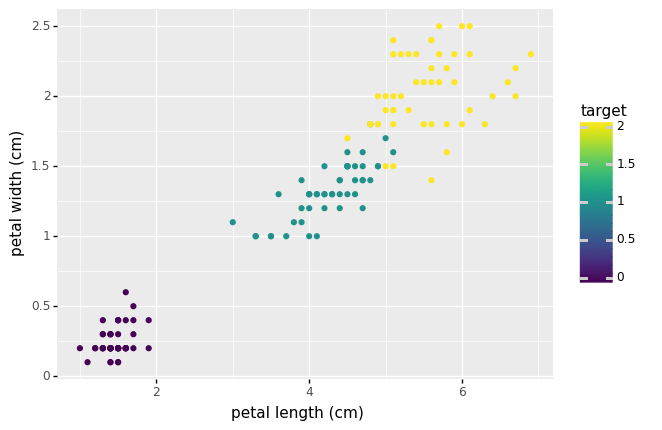

<ggplot: (137240772398)>

In [8]:
from plotnine import *
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])
ggplot(data = df) + geom_point(mapping = aes(x = 'petal length (cm)', y = 'petal width (cm)', color = 'target'))

When observing this plot, we can see that there are three distinct groups, so the issues is not with the
petal dimensions. Now try the following command, to investigate the sepal component

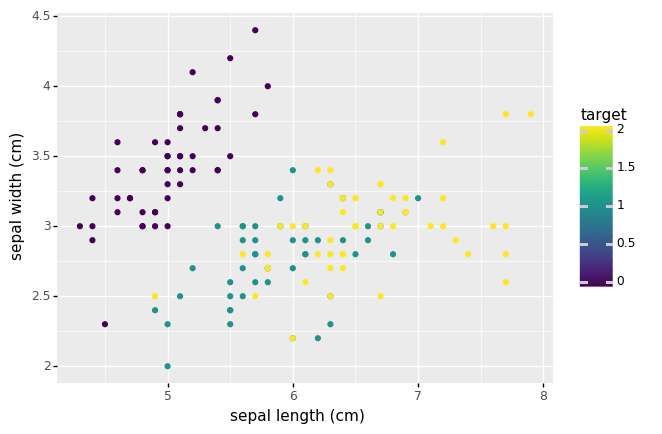

<ggplot: (137246669466)>

In [9]:
ggplot(data = df) + geom_point(mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'target'))

We can now see that the issue is due to the overlap within the natural groupings of two of the classes
within the sepal dimensions. To further examine the issue, we can plot the centroid locations, using the
feature coordinates of the two features pertaining to the sepal. Use the following commands:

In [10]:
cluster_centroids = pd.DataFrame(clusters_k3.cluster_centers_,columns= iris['feature_names'])
cluster_centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


Notice that as we are creating a plot using two different data sets, we must set the data parameter at the geom level rather than at the global level. We can now see the location of the three cluster centroids and observe how each centroid attempt to find the optimum location for class membership identification.
We have now seen how clustering is able to assist in the labelling on unlabelled or unstructured data. Even when the results are not perfect, the value of clustering is that patterns and grouping within a dataset can be identified and used a basis for further investigation and analysis.

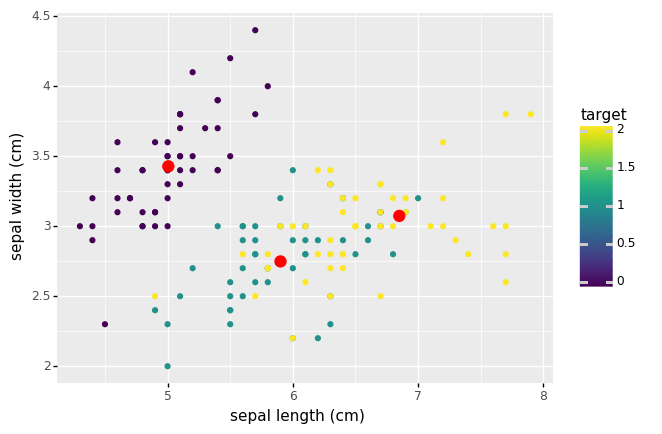

<ggplot: (137246570433)>

In [11]:
ggplot(data = None) + geom_point(data = df, mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'target')) + geom_point(data = cluster_centroids, mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)'), color = "red", size = 4)

# Data Pre-processing
One of the most essential phases of any machine learning task is ensuring that the data is in the optimal
state for processing, prior to building any models.

In [12]:
import pandas as pd
churn=pd.read_csv('C:/Users/prisc/Desktop/ejercicios python/Northumbria/datasets/churn.csv')
print(churn.head())
print(churn['tenure'])

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

We must ensure that there is no column with empty values. We will remove the rows having empty
values under a given column using code lines below. Indexes of all rows having empty TotalCharges
value is stored in a variable.

In [13]:
#Delete rows with empty TotalCharges
emptyRows = churn[churn['TotalCharges'].str.match(' ')].index
emptyRows
churn = churn.drop(emptyRows)
churn.shape

(7032, 21)

View the dataset, once you have loaded it in. You should notice that the data is primarily made up of data which is either Boolean or of a single digit order of magnitude. However, there are four features (“tenure”, “Contract”, “MonthlyCharges” and “TotalCharges”) that have a significantly larger spread of values. To enable the machine learning algorithms to perform better, we will scale these features using the method used in previous weeks. Use the commands given below to write the appropriate function and apply that function to the “tenure” feature.
After this has been completed, apply the function to the other features that also require scaling.

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
churn[['tenure']] = min_max_scaler.fit_transform(churn[['tenure']])
churn[['MonthlyCharges']] = min_max_scaler.fit_transform(churn[['MonthlyCharges']])
churn[['TotalCharges']] = min_max_scaler.fit_transform(churn[['TotalCharges']])
print(churn['tenure']) 

0       0.000000
1       0.464789
2       0.014085
3       0.619718
4       0.014085
          ...   
7038    0.323944
7039    1.000000
7040    0.140845
7041    0.042254
7042    0.915493
Name: tenure, Length: 7032, dtype: float64


 “customerID” feature should be removed, as the randomness
inherent in that feature will inhibit the effectiveness of the classification.

In [15]:
del churn['customerID']
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


Machine learning models depend on at least two sets of data: training data and testing data (a third set
– validation data – is sometimes also used to help ensure that the model will be useful when faced with
unseen data). The training data provides the basis for a model to be trained, as in, the characteristics of
data within this set are learned and associated with a particular class membership. The testing set
provides data for the model to test, so that the efficacy and effectiveness of the model can be
established.
Before we can begin to build any models, we must therefore split our dataset into two smaller subsets.
The ratio of training to testing data will vary depending on a number of factors, including the size of the
dataset itself (larger datasets allow for splits more heavily biased in favour of the training data, whereas
smaller datasets may have to be more even to ensure that there are enough observations within the
testing set), and the types of algorithms that is to be used. The most common splits are 70/30 and
80/20; for this exercise, we will use the latter.

To perform this split, a random number approach will be used. To achieve this within Python, we will allocate a pseudo-random value of either 1 or 0 to every observation within the dataset, with the probability of 0.8 for a 1, and 0.2 (or more accurately, 1 - 0.8), for 0. The random_state parameter of train_test_split function represent pseudo-random value. The second line divide the dataset up into the training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split
trainset , testset   = train_test_split(churn, train_size=0.8, random_state=1)

In [17]:
#trainset.iloc[: , :19].shape
trainset.iloc[:,-1:].shape

(5625, 1)

# Decision Tree

Decision Trees are simple but robust classifiers that can be used with a variety of data types, that have
the advantage of being easily interpretable. Furthermore, while we have performed some preparatory
activities to ready the data for use, this is not always essential when using this method. Decision Trees
are an intuitive concept; each “leaf” node represents a feature within the dataset, with each branch
being the possible values (or ranges of values) associated with each feature. These can be mapped out –
with class predictions attached – to create a tree-like structure.
To build a decision tree, we will use sklearn package for the model and to visualise the resulting tree.
Import the package using following command:

In [18]:
from sklearn import tree , preprocessing
from matplotlib import pyplot as plt
#1
le = preprocessing.LabelEncoder() 
trainsetEncoded = trainset.apply(le.fit_transform)
#2
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
#3
features = trainsetEncoded.iloc[: , :19]
target = trainsetEncoded.iloc[:,-1:]
clf = clf.fit(features, target )

1. When building the decision tree, we need to encode feature values to numeric representation such as ‘yes’ and ‘no’ to 1 and 0. The preprocessing module of the sklearn library has function LabelEncoder() that can transform all string type feature values into numeric representation.

2. The decision tree model can be initiated using DecisionTreeClassifier() function. The max_depth parameter is used to decide about depth of the tree.

3. The decision tree model can be trained on testset using fit() function. The fit() function require features is first parameter and class labels or the target as second. Out churn trainset has 20 columns, where the last one is the class label. The following statements separates first 19 columns as features and the last column as target variable.

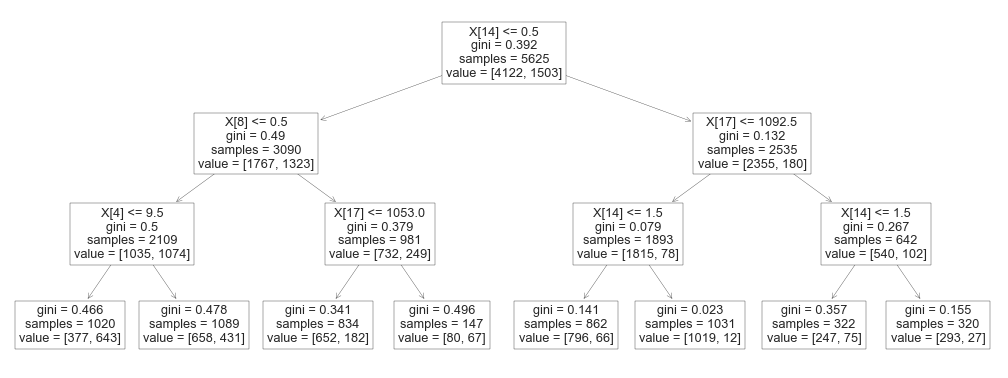

In [19]:
#Once the tree has been built, we can then visualise it to explore the results. Use the code given below.

from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=80)
tree.plot_tree(clf)
plt.show()

The plot that is created should look similar to the one shown above. However, the feature name on
which the decision tree has made a decision will not be shown. The right branch of every node
represents true value while the left branch shows the false. Use the following code to display feature
names along with their conditional values:

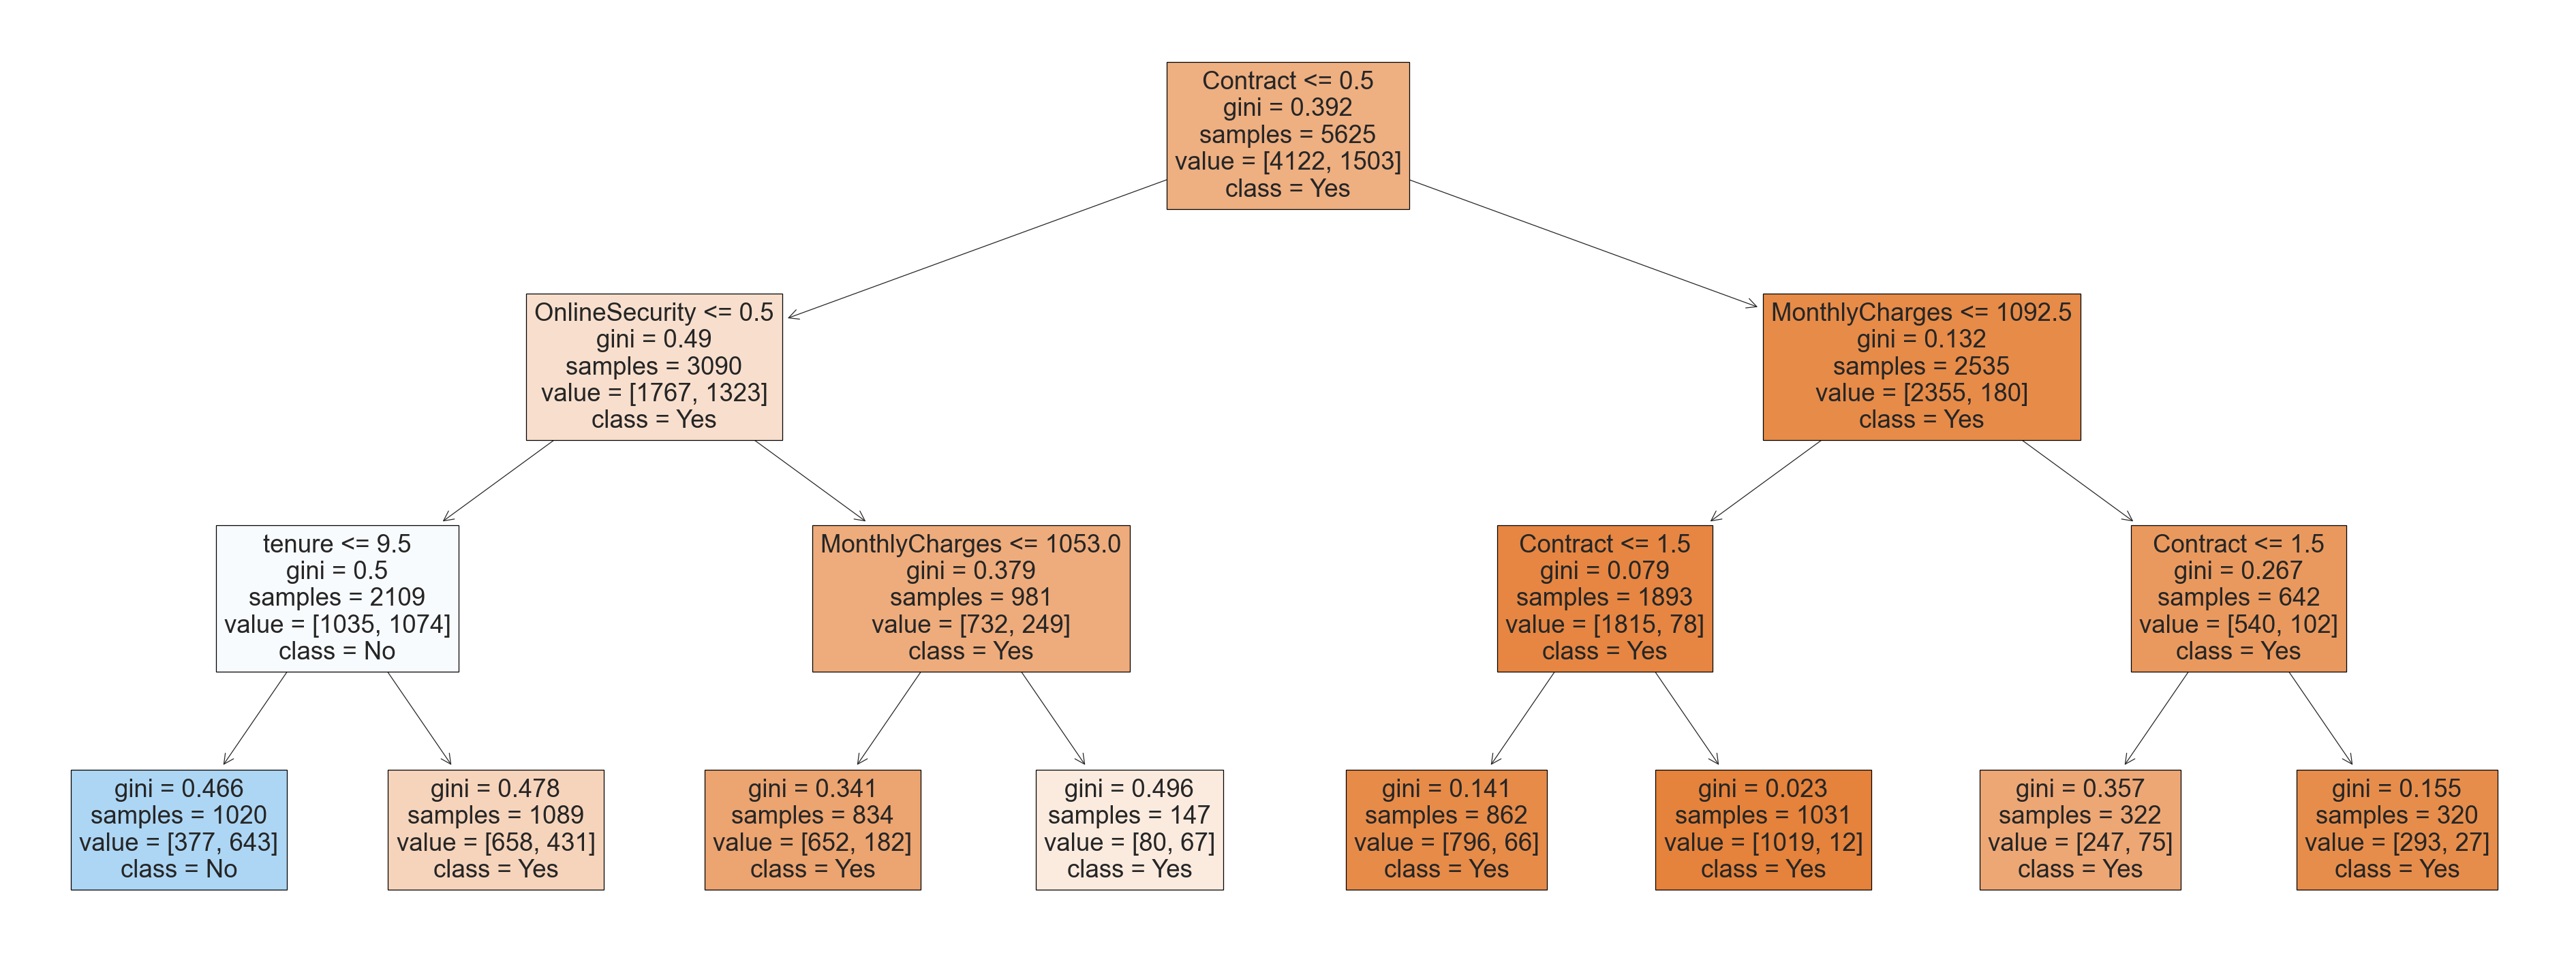

In [20]:
fn=list(features.columns.values)
cn=['Yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,6), dpi=300)
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

**The trained decision tree can be interpreted as follows:**

* Observations where the contract is longer will be classified as 0 (i.e., will not churn). This passes the “common sense check”; customers with plenty of time remaining on their contract are unlikely to leave.
* The customer subset that are most likely to churn are those with shorter contracts remaining and have low OnlineSecurity and tenure

This ability to gather information from the tree that allows for decisions to be made more effectively is
one of the key advantages of this approach. Once the model has been trained, the testing data must be
prepared. For the model to be tested effectively, we must remove the response variable from the
testing set, which can be performed with the following command

In [21]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [22]:
le = preprocessing.LabelEncoder()
testsetEncoded = testset.apply(le.fit_transform)
#1
testFeatures = testsetEncoded.iloc[: , :19]
testTarget = testsetEncoded.iloc[: , -1:]
testTarget.iloc[3]

Churn    0
Name: 1665, dtype: int32

1. Next, we need to generate the predicted values, applying the testing data to the model. To achieve this,
we can use the predict function of decision tree model. The predict function require features values of
instances to predict

In [23]:
#predicted= clf.predict([testFeatures.iloc[3]]) #Only third row prediction
predicted= clf.predict(testFeatures) #All rows prediction
print(predicted)

[0 0 0 ... 0 0 0]


We are predicting the third row of the test set. You can compare the prediction accuracy by comparing
testTarget of third row and final predicted output. Now that we have the predicted classes, we can
create a confusion matrix, allowing use to assess the predictive performance of the model. A confusion
matrix shows the values predicted by the model, compared with the actual label values of the training
data. There are four possible combinations:

* If both values are 0 (no) then this is a true negative, or TN.
* If both values are 1 (yes) then this is a true positive, or TP.
* If the predicted value is 0, but the actual value is 1, then this is false negative, or FN.
* If the predicted value is 1, but the actual value is 0, then this is a false positive, or FP

A confusion matrix shows the number of observations within each of the above groups. Use the plot_confusion_matrix() function to plot a confusion matrix:

C:\Users\prisc\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 1280x480 with 0 Axes>

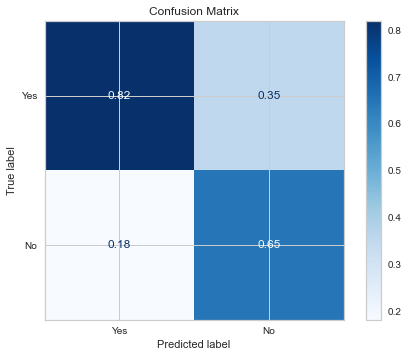

In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(clf, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

This will populate a 2 x2 table, in the same format as the diagram shown above. Each window within the
confusion matrix can be used to identify how well the classifier has performed, but as a metric for
overall performance, we will use accuracy. The accuracy of a model is the total quantity of TP and TN
results, over the total number of observations within the testing data. Use the following command to
calculate the accuracy of the model:

In [25]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, predicted)
accScore

0.7903340440653873

This value can then be converted to a percentage, for example, a value of 0.79 can be read as 79%,
meaning that the model was able to predict the correct class in 79% of cases.

# Random Forest

While a Decision Tree is an effective and useful tool, it can be prone to overfitting at times and may not
always deliver the best predictive performance. One method that can be used to improve upon these
issues (at the cost of some computational efficiency) is the use of many Trees at once, a method known
as a Random Forest. A Random Forest is an ensemble of Decision Trees, each with a subset of the total
features used. The output from all the trees in the forest are either aggregated or averages to get a
single output value for a particular data object.

In [26]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=4, random_state=0)
RFModel = RFModel.fit(features, target)

<ipython-input-26-f06ce23524af>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The first term in the fit() function identifies the training data. The second term specifies the target or the
class labels of the training data. Within the initialization of random forest model, two additional
parameters have been set: max_features, which sets the number of features to be used per tree (note
that this should never be set higher than the number of independent features that are present within
the dataset) and n_estimators, which specifies the number of trees that should be grown in the forest.
So, in this example, there will be 500 trees within the forest, with each using 5 features.

Once the model has been trained, the predict function can again be used to apply to model to the
testing data, so that the predictive capacity can be assessed. In this case, the type should be set to
“response”, as we are looking to produce a probabilistic class prediction

In [27]:
RFpredicted= RFModel.predict(testFeatures) #All rows prediction
print(RFpredicted)

[0 1 0 ... 0 0 0]


Now we have the class predictions, we can produce another confusion matrix

C:\Users\prisc\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 1280x480 with 0 Axes>

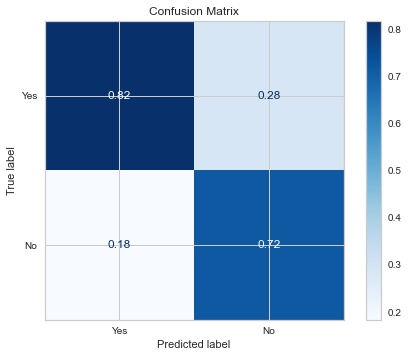

In [28]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(RFModel, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Again, we can use this as a basis for calculating the accuracy.

In [29]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, RFpredicted)
accScore

0.8024164889836531

This value can then be converted to a percentage, for example, a value of 0.801 can be read as 80.1%.
This allows for a comparison to be made with other models that have been created so far.
Random Forests are useful because they also provide interpretability, as in, they can allow us to identify
which features within the dataset are responsible for the greatest amount of variance. To do this, we can use the feature_importances_ (i.e., variable importance), using the command below. We can then
visualise the variable importance using the barplot command

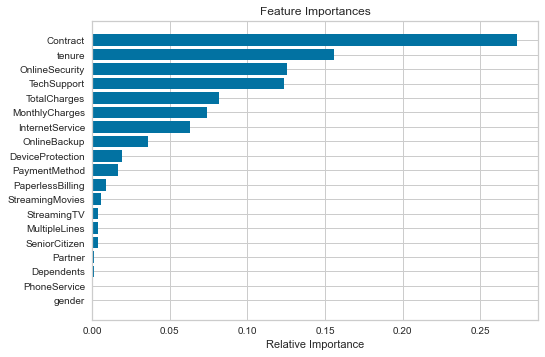

In [30]:
import numpy as np
importances = RFModel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [fn[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This should produce a plot similar to the one shown below, where the tallest bars represent the features
responsible for the most variance, or in other words, the features that contribute most to the
predictions that are made by the model. Pleasingly, the three most important features (tenure,
OnlineSecurity and contact) are the same as those identified by the decision tree, suggesting that both
models are robust and are producing reliable results.

# Support Vector Machine
The nature of an SVM as a true binary classifier, rather than a probabilistic classifier. The SVM model itself can be trained in a similar manner to the Random Forest. The second term in the function points toward the response variable, while the first directs the learner towards the data used for training.

In [47]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SvmModel = svm.SVC(kernel='sigmoid',gamma='scale',C=0.1)
#SvmModel = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SvmModel = SvmModel.fit(features,target)

C:\Users\prisc\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


**Kernels**
rbf, linear, poly, sigmoid

We can use the predict function in the same way as it was used with the Random Forest model to
generate a series of predicted values for the class of each data object. Use the following command:

In [48]:
SVMpredicted= SvmModel.predict(testFeatures) #All rows prediction
print(SVMpredicted)

[0 0 0 ... 0 0 0]


The confusion matrix and the accuracy score can be produced in the same manner as before:

C:\Users\prisc\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 1280x480 with 0 Axes>

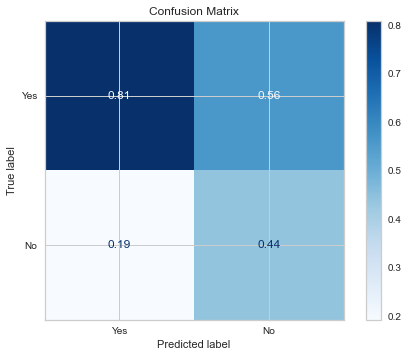

In [49]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(SvmModel, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, SVMpredicted)
accScore

0.7057569296375267

To explore the attributes of the model that has been identified, including the number of support vectors
that have been generated, use the following command:

In [35]:
SvmModel.n_support_

array([1192, 1189])

# Naïve Bayes model

In [36]:
 from sklearn.naive_bayes import GaussianNB

In [37]:
gnbModel = GaussianNB()
gnbModel = gnbModel.fit(features,target)

C:\Users\prisc\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [38]:
gnbpredicted= gnbModel.predict(testFeatures) #All rows prediction
print(gnbpredicted)

[0 1 0 ... 0 0 0]


C:\Users\prisc\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 1280x480 with 0 Axes>

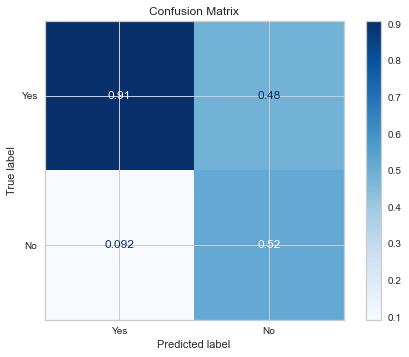

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(gnbModel, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, gnbpredicted)
accScore

0.7526652452025586